<a href="https://colab.research.google.com/github/satyhim/Machine_Learning/blob/main/Homework_PCA_Implementation_On_Boston_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA algorithm Implementation on Boston dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

We can conclude from the above description that we have 13 independent variable and one dependent (House price) variable.

In [3]:
# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)
print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [4]:
print(boston_pd.tail())

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  House Price  
501     21.0  391.99   9.67         22.4  
502     21.0  396.90   9.08         20.6  
503     21.0  396.90   5.64         23.9  
504     21.0  393.45   6.48         22.0  
505     21.0  396.90   7.88         11.9  


#Bining for House Price attributes

For using House Price attrubute we need to rename it for further calculations:

In [5]:
boston_pd.rename(columns = {'House Price':'House_Price'}, inplace = True)

In [6]:
boston_pd['House_Price_grouped'] = pd.qcut(boston_pd.House_Price, q=2, labels=[1,2])
boston_pd.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price,House_Price_grouped
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,2
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,2
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,2
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,2
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,2
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,1
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,1


In [7]:
boston_pd.drop(['House_Price'],axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price_grouped
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,2
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,2
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,2
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,2
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,2


In [8]:
# input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
	boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
	test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (379, 14) and Y = (379,) : 
Test data shape of X = (127, 14) and Y = (127,) : 


#Logistic Regression

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

# print the accuracy
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression:  0.952755905511811


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_train)

# print the accuracy
print("Accuracy of Logistic Regression: ", accuracy_score(y_train, y_pred))

Accuracy of Logistic Regression:  0.9683377308707124


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#PCA Algorithm implementation on Boston dataset

Training the Model using Reduced Features:

Let’s first get the correlation of each feature with respect to the target

In [13]:
boston_pd_corr = boston_pd.corr()['House_Price'].abs().sort_values(ascending=False)
boston_pd_corr

House_Price    1.000000
LSTAT          0.737663
RM             0.695360
PTRATIO        0.507787
INDUS          0.483725
TAX            0.468536
NOX            0.427321
CRIM           0.388305
RAD            0.381626
AGE            0.376955
ZN             0.360445
B              0.333461
DIS            0.249929
CHAS           0.175260
Name: House_Price, dtype: float64

We then extract all those features that have relatively high correlation to the target (we arbitrarily set the threshold to 0.4):

In [16]:
features = boston_pd_corr[boston_pd_corr > 0.4].index.to_list()[1:]
features   

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']

**Checking for MultiCollinearity**

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(boston_pd, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = boston_pd[X], boston_pd[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(boston_pd,features)

,VIF,Tolerance
LSTAT,2.418666,0.413451
RM,1.702434,0.587394
PTRATIO,1.491134,0.670630
INDUS,3.247388,0.307940
TAX,2.600211,0.384584
NOX,3.004119,0.332876


In [29]:
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price,House_Price_grouped
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,2
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,2
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,2
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,1
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,2
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,2


In [30]:
features

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']

**Training the Model**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = boston_pd.loc[:,features]            # get the reduced features in the 
                                  # dataframe
Y = boston_pd.iloc[:, -1]
# perform a split
x_train, x_test, y_train, y_test = train_test_split(
	boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
	test_size = 0.25,random_state=1)

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
print("Accuracy=",log_reg.score(x_test,y_test))

Accuracy= 0.968503937007874


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#Training the Model using Reduced Features (PCA)

**Performing Standard Scaling**

In [37]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe
X = boston_pd.loc[:,features]
y = boston_pd.iloc[:,-1]
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

**Applying Principal Component Analysis (PCA)**

In [38]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [39]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[58.02686406 16.01485928 12.8745012   5.18780041  4.52714991  3.36882513]



In [40]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 58.02686406  74.04172334  86.91622455  92.10402496  96.63117487
 100.        ]



Text(0, 0.5, 'Explained variance (%)')

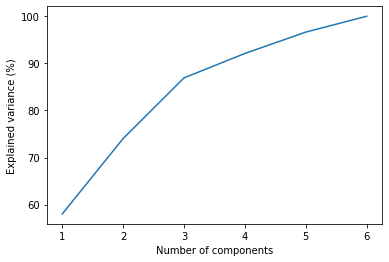

In [41]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

The scree plot makes it easy for you to visualize the number of components that are needed to capture the various amount of variability in the data:

Let’s now apply PCA to find the desired number of components based on the desired explained variance, say 85%:

Cumulative Variances (Percentage):
[58.02686406 74.04172334 86.91622455]
Number of components: 3


Text(0, 0.5, 'Explained variance (%)')

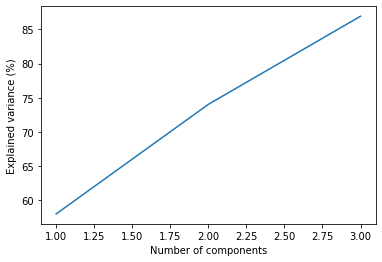

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

As you can see from the chart, 3 components are needed to cover 85% of the variability in the data.

You can also find out the importance of each feature that contributes to each of the components using the components_ attribute of the pca object:

In [47]:
boston_pd.shape

(506, 15)

In [43]:
pca_components = abs(pca.components_)
print(pca_components)

[[0.4418065  0.33140421 0.30185626 0.46851393 0.44435796 0.43232138]
 [0.18265643 0.60465316 0.50631201 0.26560652 0.24764707 0.46130624]
 [0.33742511 0.4802361  0.72250995 0.03925474 0.32305719 0.16610259]]


In [46]:
print('Top 3 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {boston_pd.columns[indices].to_list()}')

Top 3 most important features in each component
Component 0: ['CHAS', 'NOX', 'CRIM', 'RM']
Component 1: ['ZN', 'INDUS', 'RM', 'CHAS']
Component 2: ['INDUS', 'ZN', 'CRIM', 'NOX']


You can now transform the standardized data of the 15 columns in the dataset to the 3 principal components:

In [48]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(506, 3)
[[-2.01465589  0.61160666  0.73451462]
 [-1.41020331 -0.38272661  0.17882696]
 [-2.08737736  0.40623622 -0.58557443]
 ...
 [-0.63994117  0.08423187 -1.37352172]
 [-0.50199113 -0.09405443 -1.20927187]
 [-0.05457623 -0.78802774 -0.62034664]]


**Creating a Machine Learning Pipeline**

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

We then split the dataset into training and testing sets and train the model using the training set:

In [60]:
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=1)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                ('regressor', LogisticRegression())])

In [61]:
print("Accuracy=",log_regress_model.score(X_test,y_test))

Accuracy= 0.881578947368421


#Conclusion: 

With the help of PCA methods we can achieve 88.15 % accuracy by using only 3 features from Boston dataset.